## Centiro (Internship Assignment)
### Problem Statement

1. Identify and extract actionable insights that can inform business decisions.
2. Group similar data points, uncovering patterns and relationships within the dataset.

3. Develop and implement a classification model based on the analyzed data, aiming to categorize new case data in an appropriate priority effectively and efficiently.

In [1]:
#Import Essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import Dataset
df = pd.read_csv('DSINTERN 1.csv')
df.head(10)

,priority,subject,Description
0,2.0,Wireless Mouse suddenly stops working,"Dear Support Team, I've been using the Wireles..."
1,2.0,Problème de connexions IP PBX,"Bonjour, nous rencontrons un problème avec not..."
2,2.0,Problem mit meinem SFX-Netzteil,"Sehr geehrte Damen und Herren, mein SFX-Netzte..."
3,2.0,Invoice Adjustment Request,"Dear Customer Support,\nI recently received my..."
4,2.0,Issue with Arbitrum: UI not loading,"Hello Support Team,\nI've been experiencing an..."
5,1.0,Pregunta sobre actualización Drug Discovery,"Estimados, me gustaría saber si hay alguna act..."
6,3.0,Dringendes Problem mit Adobe Premiere Pro 2021,"Hallo Team,Adobe Premiere Pro 2021 stürzt stän..."
7,2.0,Changement d'adresse de facturation souhaité,"Bonjour, pourriez-vous mettre à jour notre adr..."
8,2.0,Demande de mise à jour des droits d'accès,"Bonjour Service IT, je rencontre des difficult..."
9,2.0,Issue with Portable Console - Screen flickering,The screen flickers randomly during use.


In [3]:
#Explore Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   priority     191 non-null    float64
 1   subject      204 non-null    object 
 2   Description  204 non-null    object 
dtypes: float64(1), object(2)
memory usage: 5.0+ KB


In [4]:
df.isnull().sum()

priority       17
subject         4
Description     4
dtype: int64

#### Pre-processing

In [5]:
# Fill null values of 'Subject' and 'Description' columns
df['Description'] = df['Description'].fillna(value = 'No description available')
df['subject'] = df['subject'].fillna(value= 'Issue')
df.isnull().sum()

priority       17
subject         0
Description     0
dtype: int64

In [6]:
#Create a single column containing both 'Subject' and 'Description'
df['combined'] = df['subject']+' '+df['Description']
df.head()

,priority,subject,Description,combined
0,2.0,Wireless Mouse suddenly stops working,"Dear Support Team, I've been using the Wireles...",Wireless Mouse suddenly stops working Dear Sup...
1,2.0,Problème de connexions IP PBX,"Bonjour, nous rencontrons un problème avec not...","Problème de connexions IP PBX Bonjour, nous re..."
2,2.0,Problem mit meinem SFX-Netzteil,"Sehr geehrte Damen und Herren, mein SFX-Netzte...",Problem mit meinem SFX-Netzteil Sehr geehrte D...
3,2.0,Invoice Adjustment Request,"Dear Customer Support,\nI recently received my...",Invoice Adjustment Request Dear Customer Suppo...
4,2.0,Issue with Arbitrum: UI not loading,"Hello Support Team,\nI've been experiencing an...",Issue with Arbitrum: UI not loading Hello Supp...


#### Detect Languages

In [7]:
# !pip install langdetect

from langdetect import detect, detect_langs

# Language detection
df['Detected language'] = df['combined'].apply(lambda x:detect(str(x)))
df.head()

,priority,subject,Description,combined,Detected language
0,2.0,Wireless Mouse suddenly stops working,"Dear Support Team, I've been using the Wireles...",Wireless Mouse suddenly stops working Dear Sup...,en
1,2.0,Problème de connexions IP PBX,"Bonjour, nous rencontrons un problème avec not...","Problème de connexions IP PBX Bonjour, nous re...",fr
2,2.0,Problem mit meinem SFX-Netzteil,"Sehr geehrte Damen und Herren, mein SFX-Netzte...",Problem mit meinem SFX-Netzteil Sehr geehrte D...,de
3,2.0,Invoice Adjustment Request,"Dear Customer Support,\nI recently received my...",Invoice Adjustment Request Dear Customer Suppo...,en
4,2.0,Issue with Arbitrum: UI not loading,"Hello Support Team,\nI've been experiencing an...",Issue with Arbitrum: UI not loading Hello Supp...,en


In [8]:
language_dist = df['Detected language'].value_counts()
language_dist

en    69
de    57
es    48
fr    32
ru     1
lv     1
Name: Detected language, dtype: int64

#### Basic Insights Report

In [9]:
#Basic Text Preprocessing
df['text_length'] = df['Description'].str.len()
df['word_count'] = df['Description'].str.split().str.len()

In [10]:
#Get category distribution
print("Priority Distribution: ")
print(df['priority'].value_counts())
print("\nLanguage Distribution: ")
print(language_dist)

Priority Distribution: 
3.0    78
2.0    68
1.0    42
5.0     3
Name: priority, dtype: int64

Language Distribution: 
en    69
de    57
es    48
fr    32
ru     1
lv     1
Name: Detected language, dtype: int64


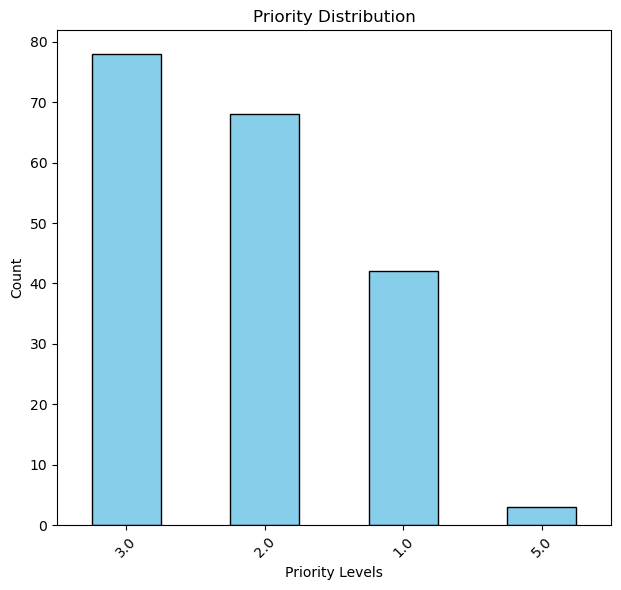

In [11]:
priority_distribution = df['priority'].value_counts()
language_distribution = language_dist

# Plot Priority Distribution
plt.figure(figsize=(12, 6))

# Subplot for Priority Distribution
plt.subplot(1, 2, 1)
priority_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Priority Distribution')
plt.xlabel('Priority Levels')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adjust layout and display
plt.tight_layout()
plt.show()

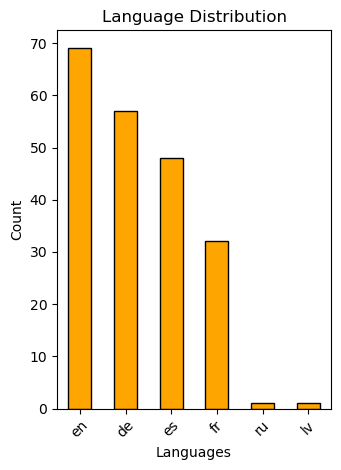

In [12]:
# Subplot for Language Distribution
plt.subplot(1, 2, 2)
language_distribution.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Language Distribution')
plt.xlabel('Languages')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adjust layout and display
plt.tight_layout()
plt.show()

#### Translate Text into English

In [13]:
# !pip install sentencepiece

In [14]:
# !pip uninstall protobuf -y
# !pip install protobuf==3.20.3


In [15]:
# !pip uninstall googletrans -y
# !pip install googletrans==4.0.0-rc1


In [16]:
# !pip install googletrans==4.0.0-rc1

from googletrans import Translator

# Initialize the translator
translator = Translator()

# Translate text to English
df['eng_combined'] = df['combined'].apply(lambda x: translator.translate(x, src='auto', dest='en').text)
df.head()

,priority,subject,Description,combined,Detected language,text_length,word_count,eng_combined
0,2.0,Wireless Mouse suddenly stops working,"Dear Support Team, I've been using the Wireles...",Wireless Mouse suddenly stops working Dear Sup...,en,249,41,Wireless Mouse suddenly stops working Dear Sup...
1,2.0,Problème de connexions IP PBX,"Bonjour, nous rencontrons un problème avec not...","Problème de connexions IP PBX Bonjour, nous re...",fr,270,36,"Problem IP PBX connections Hello, we encounter..."
2,2.0,Problem mit meinem SFX-Netzteil,"Sehr geehrte Damen und Herren, mein SFX-Netzte...",Problem mit meinem SFX-Netzteil Sehr geehrte D...,de,215,29,Problem with my SFX power supply Dear Sir or M...
3,2.0,Invoice Adjustment Request,"Dear Customer Support,\nI recently received my...",Invoice Adjustment Request Dear Customer Suppo...,en,298,47,Invoice Adjustment Request Dear Customer Suppo...
4,2.0,Issue with Arbitrum: UI not loading,"Hello Support Team,\nI've been experiencing an...",Issue with Arbitrum: UI not loading Hello Supp...,en,302,46,Issue with Arbitrum: UI not loading Hello Supp...


#### Text Analysis

Remove Punctuations

In [17]:
import string
string.punctuation

def remove_pun(text):
  punfree = ''.join([i for i in text if i not in string.punctuation])
  return punfree.lower()

df['punfree_combined'] = df['eng_combined'].apply(lambda x:remove_pun(x))


In [18]:
df.head(3)

,priority,subject,Description,combined,Detected language,text_length,word_count,eng_combined,punfree_combined
0,2.0,Wireless Mouse suddenly stops working,"Dear Support Team, I've been using the Wireles...",Wireless Mouse suddenly stops working Dear Sup...,en,249,41,Wireless Mouse suddenly stops working Dear Sup...,wireless mouse suddenly stops working dear sup...
1,2.0,Problème de connexions IP PBX,"Bonjour, nous rencontrons un problème avec not...","Problème de connexions IP PBX Bonjour, nous re...",fr,270,36,"Problem IP PBX connections Hello, we encounter...",problem ip pbx connections hello we encounter ...
2,2.0,Problem mit meinem SFX-Netzteil,"Sehr geehrte Damen und Herren, mein SFX-Netzte...",Problem mit meinem SFX-Netzteil Sehr geehrte D...,de,215,29,Problem with my SFX power supply Dear Sir or M...,problem with my sfx power supply dear sir or m...


Perform Tokenization

In [19]:
def tokenization(text):
  tokens = text.split()
  return tokens

df['tokens'] = df['punfree_combined'].apply(lambda x:tokenization(x))
df.loc[1,'tokens']

['problem',
 'ip',
 'pbx',
 'connections',
 'hello',
 'we',
 'encounter',
 'a',
 'problem',
 'with',
 'our',
 'pbx',
 'ip',
 'equipmentconnections',
 'are',
 'unstable',
 'and',
 'we',
 'observe',
 'frequent',
 'interruptionsthis',
 'strongly',
 'affects',
 'our',
 'internal',
 'communicationyour',
 'assistance',
 'would',
 'be',
 'much',
 'appreciated',
 'to',
 'solve',
 'this',
 'problem',
 'quickly']

In [20]:
df.head(3)

,priority,subject,Description,combined,Detected language,text_length,word_count,eng_combined,punfree_combined,tokens
0,2.0,Wireless Mouse suddenly stops working,"Dear Support Team, I've been using the Wireles...",Wireless Mouse suddenly stops working Dear Sup...,en,249,41,Wireless Mouse suddenly stops working Dear Sup...,wireless mouse suddenly stops working dear sup...,"[wireless, mouse, suddenly, stops, working, de..."
1,2.0,Problème de connexions IP PBX,"Bonjour, nous rencontrons un problème avec not...","Problème de connexions IP PBX Bonjour, nous re...",fr,270,36,"Problem IP PBX connections Hello, we encounter...",problem ip pbx connections hello we encounter ...,"[problem, ip, pbx, connections, hello, we, enc..."
2,2.0,Problem mit meinem SFX-Netzteil,"Sehr geehrte Damen und Herren, mein SFX-Netzte...",Problem mit meinem SFX-Netzteil Sehr geehrte D...,de,215,29,Problem with my SFX power supply Dear Sir or M...,problem with my sfx power supply dear sir or m...,"[problem, with, my, sfx, power, supply, dear, ..."


Remove Stop words

In [21]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords = stopwords.words('english')

def no_stopwords(text):
  output = [i for i in text if i not in stopwords ]
  return output

df['clean_tokens'] = df['tokens'].apply(lambda x:no_stopwords(x))
df.loc[1,'clean_tokens']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['problem',
 'ip',
 'pbx',
 'connections',
 'hello',
 'encounter',
 'problem',
 'pbx',
 'ip',
 'equipmentconnections',
 'unstable',
 'observe',
 'frequent',
 'interruptionsthis',
 'strongly',
 'affects',
 'internal',
 'communicationyour',
 'assistance',
 'would',
 'much',
 'appreciated',
 'solve',
 'problem',
 'quickly']

In [22]:
df.head(3)

,priority,subject,Description,combined,Detected language,text_length,word_count,eng_combined,punfree_combined,tokens,clean_tokens
0,2.0,Wireless Mouse suddenly stops working,"Dear Support Team, I've been using the Wireles...",Wireless Mouse suddenly stops working Dear Sup...,en,249,41,Wireless Mouse suddenly stops working Dear Sup...,wireless mouse suddenly stops working dear sup...,"[wireless, mouse, suddenly, stops, working, de...","[wireless, mouse, suddenly, stops, working, de..."
1,2.0,Problème de connexions IP PBX,"Bonjour, nous rencontrons un problème avec not...","Problème de connexions IP PBX Bonjour, nous re...",fr,270,36,"Problem IP PBX connections Hello, we encounter...",problem ip pbx connections hello we encounter ...,"[problem, ip, pbx, connections, hello, we, enc...","[problem, ip, pbx, connections, hello, encount..."
2,2.0,Problem mit meinem SFX-Netzteil,"Sehr geehrte Damen und Herren, mein SFX-Netzte...",Problem mit meinem SFX-Netzteil Sehr geehrte D...,de,215,29,Problem with my SFX power supply Dear Sir or M...,problem with my sfx power supply dear sir or m...,"[problem, with, my, sfx, power, supply, dear, ...","[problem, sfx, power, supply, dear, sir, madam..."


Perform Stemming

In [23]:
from nltk.stem.porter import PorterStemmer

porter_stemmer = PorterStemmer()

def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

df['stemmed'] = df['clean_tokens'].apply(lambda x:stemming(x))
df.loc[1,'stemmed']

['problem',
 'ip',
 'pbx',
 'connect',
 'hello',
 'encount',
 'problem',
 'pbx',
 'ip',
 'equipmentconnect',
 'unstabl',
 'observ',
 'frequent',
 'interruptionsthi',
 'strongli',
 'affect',
 'intern',
 'communicationyour',
 'assist',
 'would',
 'much',
 'appreci',
 'solv',
 'problem',
 'quickli']

In [24]:
df.head(3)

,priority,subject,Description,combined,Detected language,text_length,word_count,eng_combined,punfree_combined,tokens,clean_tokens,stemmed
0,2.0,Wireless Mouse suddenly stops working,"Dear Support Team, I've been using the Wireles...",Wireless Mouse suddenly stops working Dear Sup...,en,249,41,Wireless Mouse suddenly stops working Dear Sup...,wireless mouse suddenly stops working dear sup...,"[wireless, mouse, suddenly, stops, working, de...","[wireless, mouse, suddenly, stops, working, de...","[wireless, mous, suddenli, stop, work, dear, s..."
1,2.0,Problème de connexions IP PBX,"Bonjour, nous rencontrons un problème avec not...","Problème de connexions IP PBX Bonjour, nous re...",fr,270,36,"Problem IP PBX connections Hello, we encounter...",problem ip pbx connections hello we encounter ...,"[problem, ip, pbx, connections, hello, we, enc...","[problem, ip, pbx, connections, hello, encount...","[problem, ip, pbx, connect, hello, encount, pr..."
2,2.0,Problem mit meinem SFX-Netzteil,"Sehr geehrte Damen und Herren, mein SFX-Netzte...",Problem mit meinem SFX-Netzteil Sehr geehrte D...,de,215,29,Problem with my SFX power supply Dear Sir or M...,problem with my sfx power supply dear sir or m...,"[problem, with, my, sfx, power, supply, dear, ...","[problem, sfx, power, supply, dear, sir, madam...","[problem, sfx, power, suppli, dear, sir, madam..."


In [25]:
nltk.download('wordnet')  # WordNet is required for lemmatization
nltk.download('omw-1.4')  # Optional: for more languages and WordNet extensions
nltk.download('punkt')    # Tokenizer (if needed)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Perform Lemmatization

In [26]:
from nltk.stem import WordNetLemmatizer

lemmatizer1 = WordNetLemmatizer()

def lemmatizer(text):
    lemma_text = [lemmatizer1.lemmatize(word) for word in text]
    return lemma_text

df['lemmatized'] = df['stemmed'].apply(lambda x:lemmatizer(x))
df.loc[1,'lemmatized']

['problem',
 'ip',
 'pbx',
 'connect',
 'hello',
 'encount',
 'problem',
 'pbx',
 'ip',
 'equipmentconnect',
 'unstabl',
 'observ',
 'frequent',
 'interruptionsthi',
 'strongli',
 'affect',
 'intern',
 'communicationyour',
 'assist',
 'would',
 'much',
 'appreci',
 'solv',
 'problem',
 'quickli']

In [27]:
df.head(3)

,priority,subject,Description,combined,Detected language,text_length,word_count,eng_combined,punfree_combined,tokens,clean_tokens,stemmed,lemmatized
0,2.0,Wireless Mouse suddenly stops working,"Dear Support Team, I've been using the Wireles...",Wireless Mouse suddenly stops working Dear Sup...,en,249,41,Wireless Mouse suddenly stops working Dear Sup...,wireless mouse suddenly stops working dear sup...,"[wireless, mouse, suddenly, stops, working, de...","[wireless, mouse, suddenly, stops, working, de...","[wireless, mous, suddenli, stop, work, dear, s...","[wireless, mous, suddenli, stop, work, dear, s..."
1,2.0,Problème de connexions IP PBX,"Bonjour, nous rencontrons un problème avec not...","Problème de connexions IP PBX Bonjour, nous re...",fr,270,36,"Problem IP PBX connections Hello, we encounter...",problem ip pbx connections hello we encounter ...,"[problem, ip, pbx, connections, hello, we, enc...","[problem, ip, pbx, connections, hello, encount...","[problem, ip, pbx, connect, hello, encount, pr...","[problem, ip, pbx, connect, hello, encount, pr..."
2,2.0,Problem mit meinem SFX-Netzteil,"Sehr geehrte Damen und Herren, mein SFX-Netzte...",Problem mit meinem SFX-Netzteil Sehr geehrte D...,de,215,29,Problem with my SFX power supply Dear Sir or M...,problem with my sfx power supply dear sir or m...,"[problem, with, my, sfx, power, supply, dear, ...","[problem, sfx, power, supply, dear, sir, madam...","[problem, sfx, power, suppli, dear, sir, madam...","[problem, sfx, power, suppli, dear, sir, madam..."


Convert List into string

In [28]:
df['lemmatized'] = df['lemmatized'].map(' '.join)
df.loc[1,'lemmatized']

'problem ip pbx connect hello encount problem pbx ip equipmentconnect unstabl observ frequent interruptionsthi strongli affect intern communicationyour assist would much appreci solv problem quickli'

In [29]:
df.head(3)

,priority,subject,Description,combined,Detected language,text_length,word_count,eng_combined,punfree_combined,tokens,clean_tokens,stemmed,lemmatized
0,2.0,Wireless Mouse suddenly stops working,"Dear Support Team, I've been using the Wireles...",Wireless Mouse suddenly stops working Dear Sup...,en,249,41,Wireless Mouse suddenly stops working Dear Sup...,wireless mouse suddenly stops working dear sup...,"[wireless, mouse, suddenly, stops, working, de...","[wireless, mouse, suddenly, stops, working, de...","[wireless, mous, suddenli, stop, work, dear, s...",wireless mous suddenli stop work dear support ...
1,2.0,Problème de connexions IP PBX,"Bonjour, nous rencontrons un problème avec not...","Problème de connexions IP PBX Bonjour, nous re...",fr,270,36,"Problem IP PBX connections Hello, we encounter...",problem ip pbx connections hello we encounter ...,"[problem, ip, pbx, connections, hello, we, enc...","[problem, ip, pbx, connections, hello, encount...","[problem, ip, pbx, connect, hello, encount, pr...",problem ip pbx connect hello encount problem p...
2,2.0,Problem mit meinem SFX-Netzteil,"Sehr geehrte Damen und Herren, mein SFX-Netzte...",Problem mit meinem SFX-Netzteil Sehr geehrte D...,de,215,29,Problem with my SFX power supply Dear Sir or M...,problem with my sfx power supply dear sir or m...,"[problem, with, my, sfx, power, supply, dear, ...","[problem, sfx, power, supply, dear, sir, madam...","[problem, sfx, power, suppli, dear, sir, madam...",problem sfx power suppli dear sir madam sfx po...


#### Classification

Instead of train_test_split, let's consider all rows with priority 'NaN' as Test Data and rest all as Train Data.

In [30]:
priority_null = df[df['priority'].isnull()]
X_test = priority_null['lemmatized']
X_test

12    problem oper nasgehäus hello nasgehäus bought ...
13    issu expens report submiss dear account team t...
14    urgent excel problemmacro longer work sinc las...
15    problem huion inspirey h1060p connect hello su...
16    urgentproblem carbon manag hello last updat ca...
17    error dialog window sketchup pro 2021 hello su...
18    timesheet entri softwar malfunct hello support...
19    critic smart pet camera complet failur hello s...
20    urgent usbhub malfunct need assist asap dear s...
21    inquiri differ compani name invoic differ comp...
22    consult cancel subscript hello support equip w...
23    crucial problem sale forecast repeat plant hel...
24    allinon pcgraphic error hello dear support tea...
25    small ui error confluenc hi support team ive n...
26    problem fl studio import sampl good morn probl...
27    udemi issu progress track hi support teamiv no...
28    heroku dashboard respond hello support team si...
Name: lemmatized, dtype: object

New variable for Train Data

In [31]:
df1 = df.dropna()
df1 = df1[['priority', 'lemmatized']]


Perform Vectorization on Train Data

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=100)  # Limit features to improve performance
X_tfidf = vectorizer.fit_transform(df1['lemmatized'])


Perform vectorization on Original Data

In [33]:
X_tfidf_1 = vectorizer.fit_transform(df['lemmatized'])

Perform vectorization on Test Data

In [34]:
X_test_tfidf = vectorizer.fit_transform(X_test)

Define X_train Data

In [35]:
X_train = X_tfidf

Define y_train Data

In [36]:
y_train = df1['priority']

##### Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()


In [38]:
rf.fit(X_train, y_train)

RandomForestClassifier()

Predict Values

In [39]:
y_pred_rf = rf.predict(X_test_tfidf)
priority_null['priority'] = y_pred_rf
#Display prediction

priority_null[['priority','lemmatized']]

C:\Users\Admin\AppData\Local\Temp\ipykernel_33904\592542690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priority_null['priority'] = y_pred_rf


,priority,lemmatized
12,3.0,problem oper nasgehäus hello nasgehäus bought ...
13,3.0,issu expens report submiss dear account team t...
14,3.0,urgent excel problemmacro longer work sinc las...
15,3.0,problem huion inspirey h1060p connect hello su...
16,2.0,urgentproblem carbon manag hello last updat ca...
17,2.0,error dialog window sketchup pro 2021 hello su...
18,1.0,timesheet entri softwar malfunct hello support...
19,3.0,critic smart pet camera complet failur hello s...
20,3.0,urgent usbhub malfunct need assist asap dear s...
21,2.0,inquiri differ compani name invoic differ comp...


Calculate Train Score

In [40]:
rf.score(X_train, y_train)

0.9947643979057592

Calculate Test Score

In [41]:
#As we don't have y_test, we will input values manually
rf.score(X_test_tfidf, np.array([3., 3., 3., 3., 2., 2., 1., 3., 3., 3., 2., 3., 2., 2., 2., 2., 2.]))

0.8235294117647058

##### Support Vector Machine (SVC) Classifier Model

In [42]:
from sklearn.svm import SVC

In [43]:
svm = SVC()

In [44]:
svm.fit(X_train, y_train)

SVC()

SVM's Train Score

In [45]:
svm.score(X_train, y_train)

0.9738219895287958

SVM's Predictions

In [46]:
y_pred_svm = svm.predict(X_test_tfidf)
y_pred_svm

array([3., 3., 3., 3., 2., 3., 3., 3., 3., 2., 2., 2., 2., 2., 2., 2., 2.])

##### Naive Bayes Classifier

In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
gnb = GaussianNB()

In [49]:
X_train_1 = X_train.toarray()

In [50]:
gnb.fit(X_train_1, y_train)

GaussianNB()

Naive Bayes's Score

In [51]:
gnb.score(X_train_1, y_train)

0.7277486910994765

In [52]:
X_test_tfidf_1 = X_test_tfidf.toarray()
y_pred_gnb = gnb.predict(X_test_tfidf_1)
y_pred_gnb

array([3., 2., 3., 3., 2., 2., 3., 3., 3., 1., 3., 2., 3., 1., 3., 2., 3.])

##### Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dc = DecisionTreeClassifier()

In [55]:
dc.fit(X_train, y_train)

DecisionTreeClassifier()

Decision Tree Classifier Score

In [56]:
dc.score(X_train, y_train)

0.9947643979057592

In [57]:
y_pred_dc = dc.predict(X_test_tfidf)
y_pred_dc

array([3., 3., 5., 3., 1., 1., 1., 3., 3., 3., 3., 1., 3., 2., 3., 2., 2.])

#### Clustering (Grouping similar Datapoints)

In [58]:
# Clustering using K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_tfidf_1)

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [59]:
# !pip install wordcloud

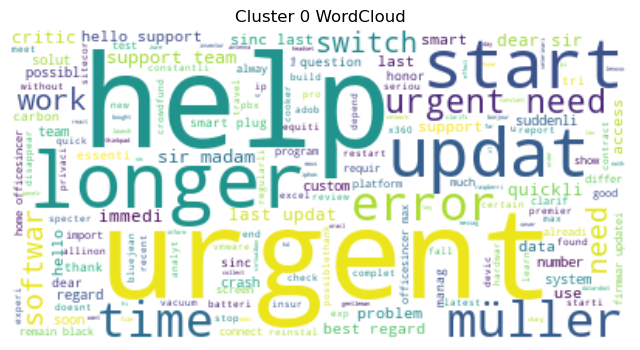

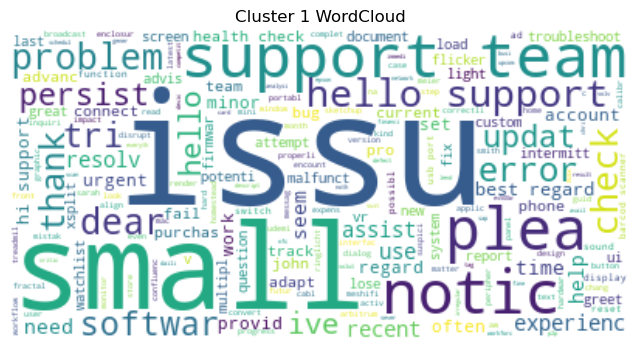

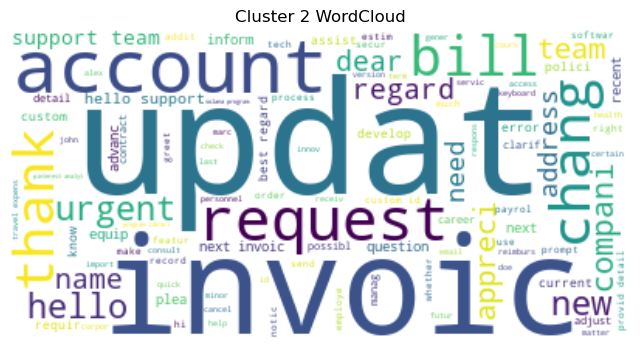

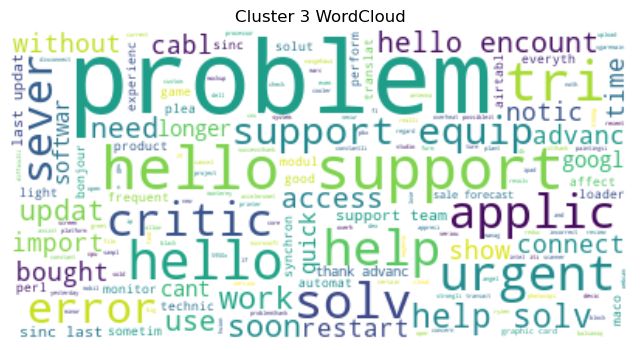

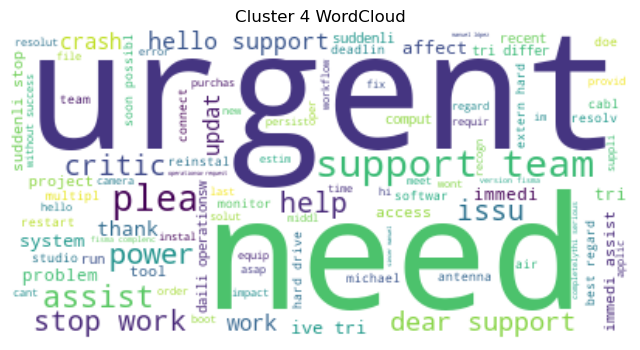

In [60]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Visualize Clusters with WordClouds
for cluster in range(5):
    cluster_data = df[df['cluster'] == cluster]
    text = ' '.join(cluster_data['lemmatized'])
    wordcloud = WordCloud(background_color='white').generate(text)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Cluster {cluster} WordCloud')
    plt.axis('off')
    plt.show()

In [61]:
#Get top terms per cluster
n_clusters = 5
feature_names = vectorizer.get_feature_names_out()
cluster_terms = {}
for i in range(n_clusters):
  center = kmeans.cluster_centers_[i]
  top_terms_idx = center.argsort()[-5:][::-1]
  cluster_terms[i] = [feature_names[idx] for idx in top_terms_idx]

#### Clustering Report

In [62]:
print("Cluster Distribution: ")
print(df['cluster'].value_counts())
print("\nTop terms per cluster: ")
for cluster, terms in cluster_terms.items():
  print(f"Cluster {cluster}: {', '.join(terms)}")


Cluster Distribution: 
2    47
0    44
1    41
3    39
4    37
Name: cluster, dtype: int64

Top terms per cluster: 
Cluster 0: import, urgent, issu, support, updat
Cluster 1: heroku, solv, notic, cant, thank
Cluster 2: would, help, updat, shown, advanc
Cluster 3: progress, expens, stop, fl, thank
Cluster 4: system, urgent, work, nasgehäus, bought


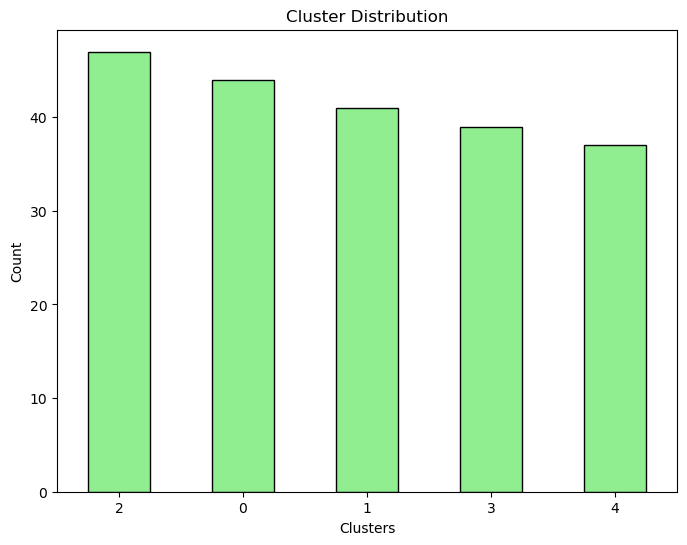


Top terms per cluster:
Cluster 0: term1, term2, term3
Cluster 1: term4, term5, term6
Cluster 2: term7, term8, term9


In [63]:
cluster_distribution = df['cluster'].value_counts()
cluster_terms = {
    0: ['term1', 'term2', 'term3'],
    1: ['term4', 'term5', 'term6'],
    2: ['term7', 'term8', 'term9']
}

# Plot Cluster Distribution
plt.figure(figsize=(8, 6))
cluster_distribution.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Cluster Distribution')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Display Top Terms Per Cluster
print("\nTop terms per cluster:")
for cluster, terms in cluster_terms.items():
    print(f"Cluster {cluster}: {', '.join(terms)}")

#### Priority Analysis by cluster (Report)

In [64]:
#Priority analysis by cluster
print("\nPriority distribution by cluster: ")
print(pd.crosstab(df['cluster'], df['priority']))


Priority distribution by cluster: 
priority  1.0  2.0  3.0  5.0
cluster                     
0           4    7   29    1
1          17   17    3    0
2          19   17    8    1
3           2   20   13    0
4           0    7   25    1


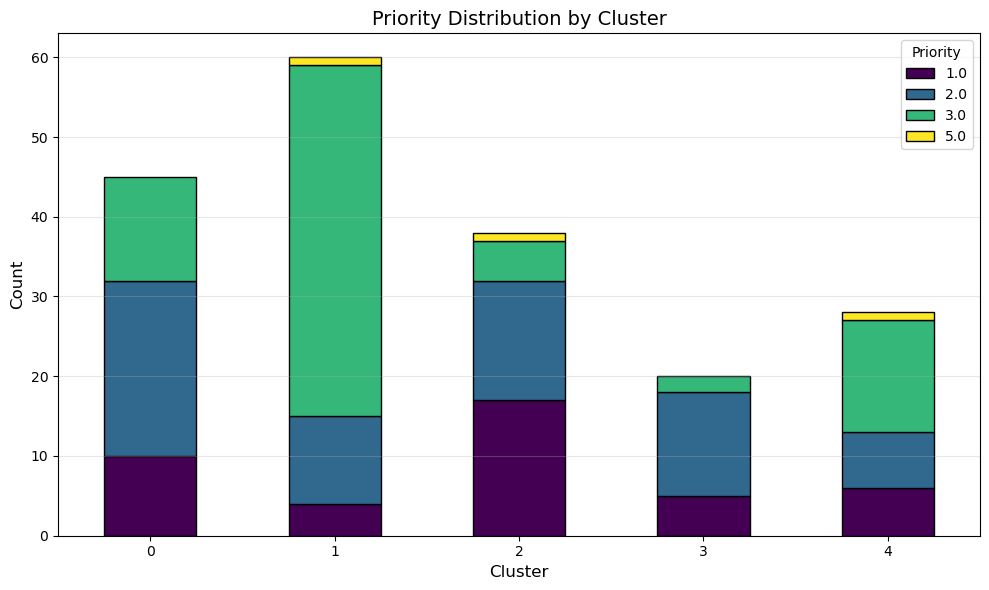

In [65]:
data = {
    '1.0': [10, 4, 17, 5, 6],
    '2.0': [22, 11, 15, 13, 7],
    '3.0': [13, 44, 5, 2, 14],
    '5.0': [0, 1, 1, 0, 1]
}
clusters = [0, 1, 2, 3, 4]
priority_distribution = pd.DataFrame(data, index=clusters)

# Plotting
priority_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis', edgecolor='black')

# Customizing the plot
plt.title("Priority Distribution by Cluster", fontsize=14)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Priority", fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Display the plot
plt.tight_layout()
plt.show()